In [1]:
import glob
import mne
import pandas as pd

In [2]:
import os
import numpy as np

# Download fsaverage files
fs_dir = mne.datasets.fetch_fsaverage(verbose=True)
subjects_dir = os.path.dirname(fs_dir)

# The files live in:
subject = 'fsaverage'
trans = 'fsaverage'  # MNE has a built-in fsaverage transformation
src = os.path.join(fs_dir, 'bem', 'fsaverage-ico-5-src.fif')
bem = os.path.join(fs_dir, 'bem', 'fsaverage-5120-5120-5120-bem-sol.fif')

0 files missing from root.txt in C:\Users\khanh.hanguyen\mne_data\MNE-fsaverage-data
0 files missing from bem.txt in C:\Users\khanh.hanguyen\mne_data\MNE-fsaverage-data\fsaverage


In [3]:
labels = mne.read_labels_from_annot('fsaverage', parc='aparc',
                                            subjects_dir=subjects_dir, verbose=False)
labels.pop(-1) # remove the unknown label
label_names = [label.name for label in labels]

In [4]:
lobe_map = {"Frontal":{
                "frontalpole":"FP",
                "medialorbitofrontal":"MO",
                "lateralorbitofrontal":"LO",
                "paracentral":"ParaC",
                "parsopercularis":"POp",
                "parsorbitalis":"POr",
                "parstriangularis":"PT",
                "precentral": "PreC",
                "rostralanteriorcingulate":"RAC",
                "rostralmiddlefrontal":"RMF",
                "superiorfrontal":"SF",
                "caudalanteriorcingulate":"CACC",
                "caudalmiddlefrontal":"CMF",
            },
            "Parietal":{
                "superiorparietal":"SP",
                "inferiorparietal":"IP",
                "isthmuscingulate":"IC",
                "postcentral":"PG",
                "posteriorcingulate":"PCC",
                "precuneus":"PCUN",
                "supramarginal":"SG",
            },
            "Temporal":{
                "bankssts":"BSTS",
                "entorhinal":"ENT",
                "fusiform":"FUS",
                "middletemporal":"MT",
                "parahippocampal":"PHG",
                "superiortemporal": "STG",
                "temporalpole":"TP",
                "transversetemporal":"TTG",
                "inferiortemporal":"ITG",
            },
            "Occipital":{
                "cuneus":"CUN",
                "lateraloccipital":"LOC",
                "lingual":"LNG",
                "pericalcarine":"PCAL",
            },
            "Insula":{
                "insula":"INS"
            }
}
lobe_map_color = {"Frontal": (1,0,0),
                  "Insula": (0,1,0),
                "Temporal": (0,0,1),
                "Parietal": (1, 1,0), 
                 "Occipital": (0,1,1),
}

In [5]:
lh_labels = ['lateraloccipital-lh','pericalcarine-lh','cuneus-lh','lingual-lh',
            'inferiorparietal-lh','superiorparietal-lh','precuneus-lh','isthmuscingulate-lh','supramarginal-lh','postcentral-lh','posteriorcingulate-lh',
            'bankssts-lh','fusiform-lh','inferiortemporal-lh','parahippocampal-lh','middletemporal-lh','transversetemporal-lh','superiortemporal-lh','entorhinal-lh','temporalpole-lh',
            'insula-lh',
            'paracentral-lh','precentral-lh','caudalmiddlefrontal-lh','parsopercularis-lh','caudalanteriorcingulate-lh','superiorfrontal-lh','lateralorbitofrontal-lh','parstriangularis-lh','rostralanteriorcingulate-lh','medialorbitofrontal-lh','parsorbitalis-lh','rostralmiddlefrontal-lh','frontalpole-lh']
rh_labels = [label[:-2] + 'rh' for label in lh_labels]

new_order = []
new_order.extend(lh_labels[::-1])  # reverse the order
new_order.extend(rh_labels)

In [18]:
new_order

['frontalpole-lh',
 'rostralmiddlefrontal-lh',
 'parsorbitalis-lh',
 'medialorbitofrontal-lh',
 'rostralanteriorcingulate-lh',
 'parstriangularis-lh',
 'lateralorbitofrontal-lh',
 'superiorfrontal-lh',
 'caudalanteriorcingulate-lh',
 'parsopercularis-lh',
 'caudalmiddlefrontal-lh',
 'precentral-lh',
 'paracentral-lh',
 'insula-lh',
 'temporalpole-lh',
 'entorhinal-lh',
 'superiortemporal-lh',
 'transversetemporal-lh',
 'middletemporal-lh',
 'parahippocampal-lh',
 'inferiortemporal-lh',
 'fusiform-lh',
 'bankssts-lh',
 'posteriorcingulate-lh',
 'postcentral-lh',
 'supramarginal-lh',
 'isthmuscingulate-lh',
 'precuneus-lh',
 'superiorparietal-lh',
 'inferiorparietal-lh',
 'lingual-lh',
 'cuneus-lh',
 'pericalcarine-lh',
 'lateraloccipital-lh',
 'lateraloccipital-rh',
 'pericalcarine-rh',
 'cuneus-rh',
 'lingual-rh',
 'inferiorparietal-rh',
 'superiorparietal-rh',
 'precuneus-rh',
 'isthmuscingulate-rh',
 'supramarginal-rh',
 'postcentral-rh',
 'posteriorcingulate-rh',
 'bankssts-rh',
 'f

In [7]:
freqs = ['delta', 'theta', 'alpha', 'beta', 'gamma']
method = 'pli'
output_dir_prefix = "output/no_split"
# condition = "al"

In [8]:
lh_labels = ['lateraloccipital-lh','pericalcarine-lh','cuneus-lh','lingual-lh',
            'inferiorparietal-lh','superiorparietal-lh','precuneus-lh','isthmuscingulate-lh','supramarginal-lh','postcentral-lh','posteriorcingulate-lh',
            'bankssts-lh','fusiform-lh','inferiortemporal-lh','parahippocampal-lh','middletemporal-lh','transversetemporal-lh','superiortemporal-lh','entorhinal-lh','temporalpole-lh',
            'insula-lh',
            'paracentral-lh','precentral-lh','caudalmiddlefrontal-lh','parsopercularis-lh','caudalanteriorcingulate-lh','superiorfrontal-lh','lateralorbitofrontal-lh','parstriangularis-lh','rostralanteriorcingulate-lh','medialorbitofrontal-lh','parsorbitalis-lh','rostralmiddlefrontal-lh','frontalpole-lh']
rh_labels = [label[:-2] + 'rh' for label in lh_labels]

In [9]:
al_sum = np.zeros((len(labels), len(labels)))
# get all the files
files = glob.glob(f"{output_dir_prefix}/*al*{method}*{freqs[0]}*.npy")
# print(files)
for file in files:
    al_sum += np.load(file)

al_sum = al_sum / len(files)

In [10]:
# make correllation matrix from left triangle part
al_sum = al_sum + al_sum.T - np.diag(al_sum.diagonal())

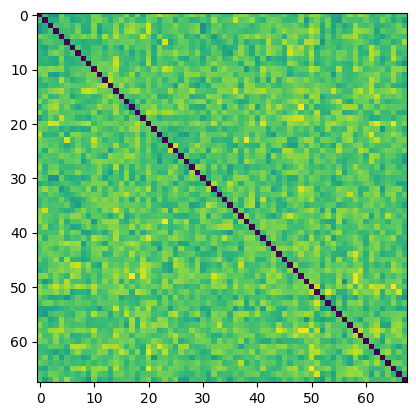

In [11]:
#plot the matrix
import matplotlib.pyplot as plt
plt.imshow(al_sum)
plt.show()

In [12]:
df_corr = pd.DataFrame(al_sum, columns = label_names, index = label_names)

In [14]:
df_pair = df_corr.stack().reset_index()

In [16]:
df_pair.columns = ['source', 'target', 'connectivity']
df_pair.head()

,source,target,connectivity
0,bankssts-lh,bankssts-lh,0.000000
1,bankssts-lh,bankssts-rh,0.185363
2,bankssts-lh,caudalanteriorcingulate-lh,0.147856
3,bankssts-lh,caudalanteriorcingulate-rh,0.135901
4,bankssts-lh,caudalmiddlefrontal-lh,0.209239


In [32]:
df_order = df_pair.set_index(['source', 'target']).reindex(new_order, level=0).reindex(new_order, level=1).reset_index()
df_order

,source,target,connectivity
0,frontalpole-lh,frontalpole-lh,0.000000
1,frontalpole-lh,rostralmiddlefrontal-lh,0.176966
2,frontalpole-lh,parsorbitalis-lh,0.145770
3,frontalpole-lh,medialorbitofrontal-lh,0.192778
4,frontalpole-lh,rostralanteriorcingulate-lh,0.187793
...,...,...,...
4619,frontalpole-rh,rostralanteriorcingulate-rh,0.198885
4620,frontalpole-rh,medialorbitofrontal-rh,0.217047
4621,frontalpole-rh,parsorbitalis-rh,0.201838
4622,frontalpole-rh,rostralmiddlefrontal-rh,0.200418


In [34]:
#transform back to correlation matrix
df_corr_order = pd.DataFrame.pivot_table(df_order, index='source', columns='target', values='connectivity', sort=False)

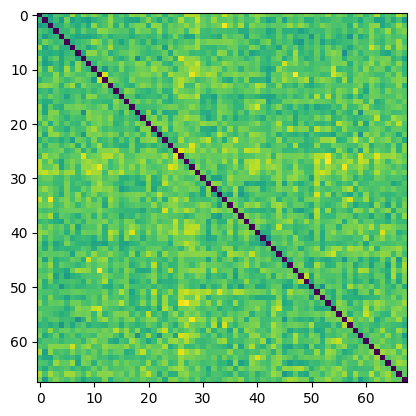

In [13]:

# create a mask to identify rows with duplicate features as mentioned above
mask_dups = (df_corr[['FEATURE_1', 'FEATURE_2']].apply(frozenset, axis=1).duplicated()) | (df_corr['FEATURE_1']==df_corr['FEATURE_2']) 

# apply the mask to clean the correlation dataframe
df_corr = df_corr[~mask_dups]

ValueError: Length mismatch: Expected axis has 68 elements, new values have 3 elements

In [43]:
df_corr

,frontalpole-lh,rostralmiddlefrontal-lh,parsorbitalis-lh,medialorbitofrontal-lh,rostralanteriorcingulate-lh,parstriangularis-lh,lateralorbitofrontal-lh,superiorfrontal-lh,caudalanteriorcingulate-lh,parsopercularis-lh,...,parsopercularis-rh,caudalanteriorcingulate-rh,superiorfrontal-rh,lateralorbitofrontal-rh,parstriangularis-rh,rostralanteriorcingulate-rh,medialorbitofrontal-rh,parsorbitalis-rh,rostralmiddlefrontal-rh,frontalpole-rh
bankssts-lh,0.216726,0.159261,0.217923,0.222724,0.200215,0.186292,0.208877,0.188687,0.147856,0.212867,...,0.217124,0.135901,0.219626,0.201218,0.213271,0.183300,0.201254,0.190986,0.160147,0.203776
bankssts-rh,0.209724,0.154990,0.202695,0.170025,0.181326,0.182853,0.205526,0.196997,0.165537,0.245188,...,0.198436,0.165144,0.188498,0.162973,0.169609,0.207517,0.175337,0.221978,0.144459,0.214268
caudalanteriorcingulate-lh,0.218298,0.159168,0.188380,0.201784,0.161515,0.188204,0.189991,0.158699,0.000000,0.185974,...,0.196688,0.191304,0.174413,0.215530,0.201773,0.208689,0.212744,0.172349,0.187027,0.157016
caudalanteriorcingulate-rh,0.212217,0.162008,0.179363,0.205781,0.162527,0.188429,0.199043,0.174728,0.191304,0.189388,...,0.183814,0.000000,0.182885,0.204306,0.203933,0.188369,0.218209,0.182133,0.194778,0.149597
caudalmiddlefrontal-lh,0.216804,0.171298,0.219107,0.181709,0.166031,0.227003,0.177731,0.219760,0.188831,0.175780,...,0.205105,0.182158,0.219902,0.188945,0.204714,0.201493,0.170309,0.207577,0.196007,0.175105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
supramarginal-rh,0.203925,0.156789,0.190361,0.156333,0.170161,0.212341,0.187109,0.174874,0.171043,0.174735,...,0.181505,0.199361,0.159390,0.199255,0.197148,0.186125,0.185463,0.189922,0.196329,0.189998
temporalpole-lh,0.177990,0.183918,0.170172,0.198106,0.183340,0.178477,0.183346,0.183865,0.178458,0.193753,...,0.236573,0.188829,0.158853,0.210465,0.203446,0.179437,0.211715,0.194456,0.201048,0.194575
temporalpole-rh,0.219199,0.180853,0.200825,0.199452,0.205705,0.180965,0.206977,0.209033,0.191506,0.187835,...,0.201511,0.188446,0.219694,0.203887,0.227041,0.216023,0.198718,0.198117,0.203626,0.226272
transversetemporal-lh,0.219212,0.157860,0.200619,0.173870,0.167340,0.207603,0.205784,0.212533,0.207446,0.198043,...,0.183348,0.203703,0.226469,0.189241,0.175441,0.182205,0.196486,0.203591,0.209873,0.191358
